In [1]:
!pip install statsmodels
!pip install scipy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
all_2020 = pd.read_csv('all_2020.csv')
all_2020['Date'] = pd.to_datetime(all_2020['Date Received'], dayfirst=True, errors='coerce')
all_2021 = pd.read_csv('all_2021.csv')
all_2021['Date'] = pd.to_datetime(all_2021['Date Received'], dayfirst=False, errors='coerce')
all_2022 = pd.read_csv('all_2022.csv')
all_2022['Date'] = pd.to_datetime(all_2022['Date Received'], dayfirst=False, errors='coerce')
all_2023 = pd.read_csv('all_2023.csv')
all_2023['Date'] = pd.to_datetime(all_2023['Date Received'], errors='coerce')
all_2024 = pd.read_csv('all_2024.csv')
all_2024['Date'] = pd.to_datetime(all_2024['Date Received'], )
all_2024 = all_2024.rename(columns={'# of samples' : 'Samples'})
del all_2024['Sample type']

In [4]:
data_raw = pd.concat([all_2020, all_2021, all_2022, all_2023, all_2024], axis=0)
data_raw

,Project ID,Project Type,Samples,Date Received,Date Completed,Date
0,20-001,Capillary+Cleanup,3,17/01/2020,17/01/2020,2020-01-17
1,20-002,Capillary,6,10/01/2020,01/10/2020,2020-01-10
2,20-004,PCR-Seq,20,16/01/2020,16/01/2020,2020-01-16
3,20-007,Extract2Seq,2,27/01/2020,27/01/2020,2020-01-27
4,20-008,Capillary+Cleanup,32,31/01/2020,31/01/2020,2020-01-31
...,...,...,...,...,...,...
137,24-144,PCR2seq,1,2024-10-22,NaN,2024-10-22
138,24-145,Extract2seq,1,2024-10-23,NaN,2024-10-23
139,24-146,Extract2seq,57,2024-10-29,NaN,2024-10-29
140,24-147,Capseq,20,2024-10-29,NaN,2024-10-29


In [5]:
data = data_raw.set_index('Date')
data['Samples'] = data['Samples'].astype(int)
data = data[['Samples']].resample('M').sum()
data = data.asfreq('M', method='ffill')
data.head()

D:\Temp\ipykernel_148\1138218992.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data[['Samples']].resample('M').sum()
D:\Temp\ipykernel_148\1138218992.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.asfreq('M', method='ffill')


,Samples
Date,
2020-01-31,179
2020-02-29,164
2020-03-31,160
2020-04-30,7
2020-05-31,0


(array([17897., 18262., 18628., 18993., 19358., 19723., 20089.]),
 [Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024'),
  Text(20089.0, 0, '2025')])

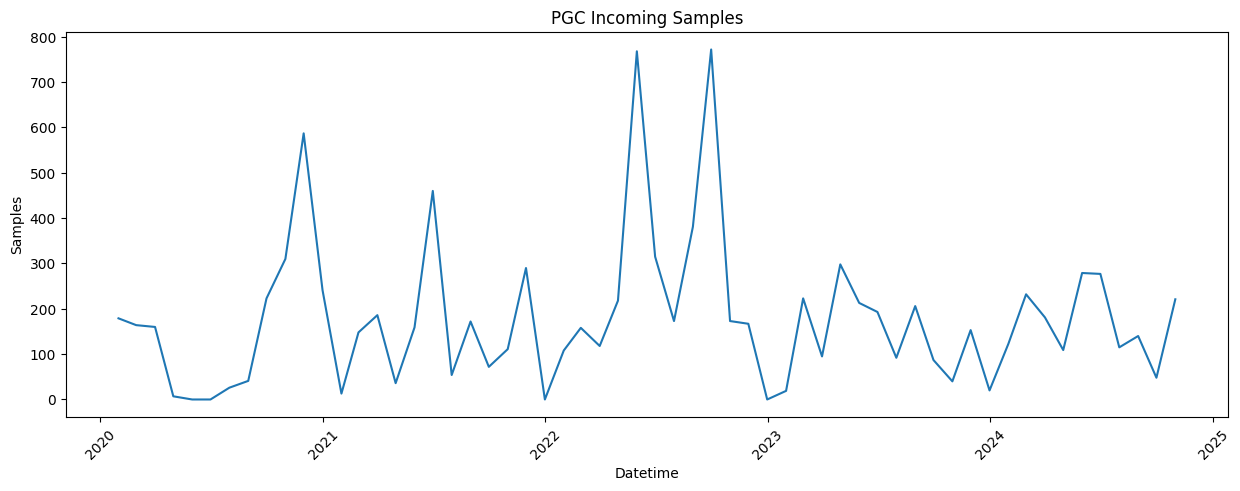

In [6]:
fig, ax = plt.subplots(figsize = (15,5))
plt.plot(data.index, data)
plt.xlabel('Datetime')
plt.ylabel('Samples')
plt.title("PGC Incoming Samples")
plt.xticks(rotation = 45)

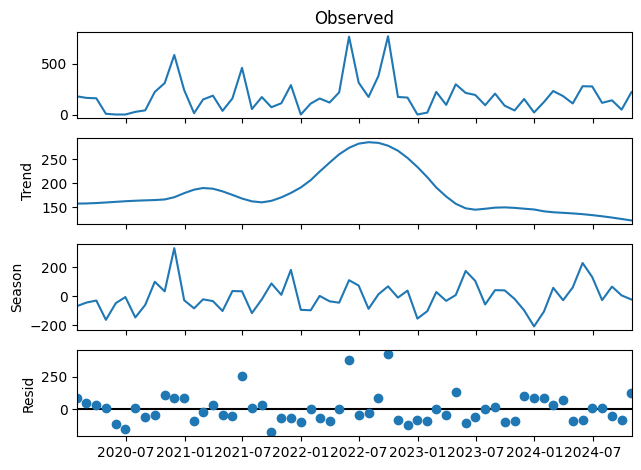

In [7]:
from statsmodels.tsa.seasonal import STL

stl = STL(data, seasonal=13)
result = stl.fit()
result.plot()
plt.show()


In [8]:
from scipy import stats
z_scores = stats.zscore(data['Samples'])
outliers = data[abs(z_scores) > 3]
print(f"Outliers: {outliers}")

Outliers:             Samples
Date               
2022-05-31      768
2022-09-30      772


D:\Temp\ipykernel_148\3174977019.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


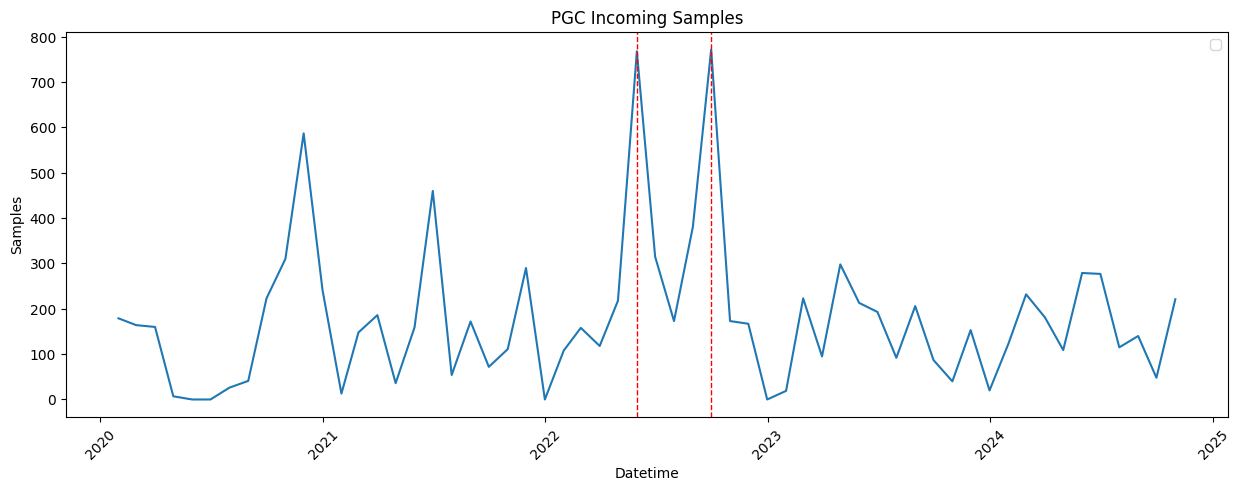

In [9]:
fig, ax = plt.subplots(figsize = (15,5))
plt.plot(data.index, data)
plt.xlabel('Datetime')
plt.ylabel('Samples')
plt.title("PGC Incoming Samples")
plt.xticks(rotation = 45)
for date in outliers.index:
    plt.axvline(x=date, color='red', linestyle='--', linewidth=1)

plt.legend()


In [10]:
z_scores = stats.zscore(all_2020['Samples'])
outliers = all_2021[abs(z_scores) > 3]
print(f"Outliers: {outliers}")

Outliers: Empty DataFrame
Columns: [Project ID, Project Type, Samples, Date Received, Date Completed, Date]
Index: []


D:\Temp\ipykernel_148\3418470867.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = all_2021[abs(z_scores) > 3]


In [11]:
z_scores = stats.zscore(all_2021['Samples'])
outliers = all_2021[abs(z_scores) > 3]
print(f"Outliers: {outliers}")

Outliers:    Project ID           Project Type  Samples Date Received Date Completed  \
38     21-053  PCR+Capillary+Cleanup      208      6/4/2021            NaN   

         Date  
38 2021-06-04  


In [12]:
z_scores = stats.zscore(all_2021['Samples'])
outliers = all_2021[abs(z_scores) > 3]
print(f"Outliers: {outliers}")

Outliers:    Project ID           Project Type  Samples Date Received Date Completed  \
38     21-053  PCR+Capillary+Cleanup      208      6/4/2021            NaN   

         Date  
38 2021-06-04  


In [13]:
z_scores = stats.zscore(all_2023['Samples'])
outliers = all_2023[abs(z_scores) > 3]
print(f"Outliers: {outliers}")

Outliers:    Project ID Project Type  Samples Date Received Date Completed       Date
36     23-055  Extract2seq      204    2023-04-28     2023-05-11 2023-04-28
87     23-115   Extraction      140    2023-11-08     2023-11-09 2023-11-08


In [14]:
z_scores = stats.zscore(all_2024['Samples'])
outliers = all_2024[abs(z_scores) > 3]
print(f"Outliers: {outliers}")

Outliers:    Project ID       Project Type  Samples Date Received Date Completed  \
5      24-007  Capillary+Cleanup       72    2024-01-23     2024-01-25   
7      24-009  Capillary+Cleanup       74    2024-02-01     2024-02-07   
58     24-065  Capillary+Cleanup       97    2024-05-02     2024-05-17   
75     24-082  Capillary+Cleanup       73    2024-05-31     2024-06-07   
93     24-099  Capillary+Cleanup       69    2024-06-26     2024-07-03   

         Date  
5  2024-01-23  
7  2024-02-01  
58 2024-05-02  
75 2024-05-31  
93 2024-06-26  


In [15]:
def remove_outliers(df):
    mean = df['Samples'].mean()
    std_dev = df['Samples'].std()
    z_scores = (df['Samples'] - mean) / std_dev
    df_cleaned = df[np.abs(z_scores) <= 3]
    return df_cleaned

all_2020_cleaned = remove_outliers(all_2020)
all_2021_cleaned = remove_outliers(all_2021)
all_2022_cleaned = remove_outliers(all_2022)
all_2023_cleaned = remove_outliers(all_2023)
all_2024_cleaned = remove_outliers(all_2024)

all_cleaned = pd.concat([all_2020_cleaned, all_2021_cleaned, all_2022_cleaned, all_2023_cleaned, all_2024_cleaned])
all_cleaned.head()


,Project ID,Project Type,Samples,Date Received,Date Completed,Date
0,20-001,Capillary+Cleanup,3,17/01/2020,17/01/2020,2020-01-17
1,20-002,Capillary,6,10/01/2020,01/10/2020,2020-01-10
2,20-004,PCR-Seq,20,16/01/2020,16/01/2020,2020-01-16
3,20-007,Extract2Seq,2,27/01/2020,27/01/2020,2020-01-27
4,20-008,Capillary+Cleanup,32,31/01/2020,31/01/2020,2020-01-31


In [16]:
data_cleaned = all_cleaned.set_index('Date')
data_cleaned.dropna(inplace=True)
data_cleaned['Samples'] = data_cleaned['Samples'].astype(int)
data_agr = data_cleaned.copy()
data_agr['Samples'] = data_agr['Samples'].astype(int)
data_agr = data_agr[['Samples']].resample('M').sum()
data_agr = data_agr.asfreq('M', method='ffill')
data_agr.head()

D:\Temp\ipykernel_148\1555699349.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_agr = data_agr[['Samples']].resample('M').sum()
D:\Temp\ipykernel_148\1555699349.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_agr = data_agr.asfreq('M', method='ffill')


,Samples
Date,
2020-01-31,179
2020-02-29,164
2020-03-31,160
2020-04-30,7
2020-05-31,0


(array([17897., 18262., 18628., 18993., 19358., 19723., 20089.]),
 [Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024'),
  Text(20089.0, 0, '2025')])

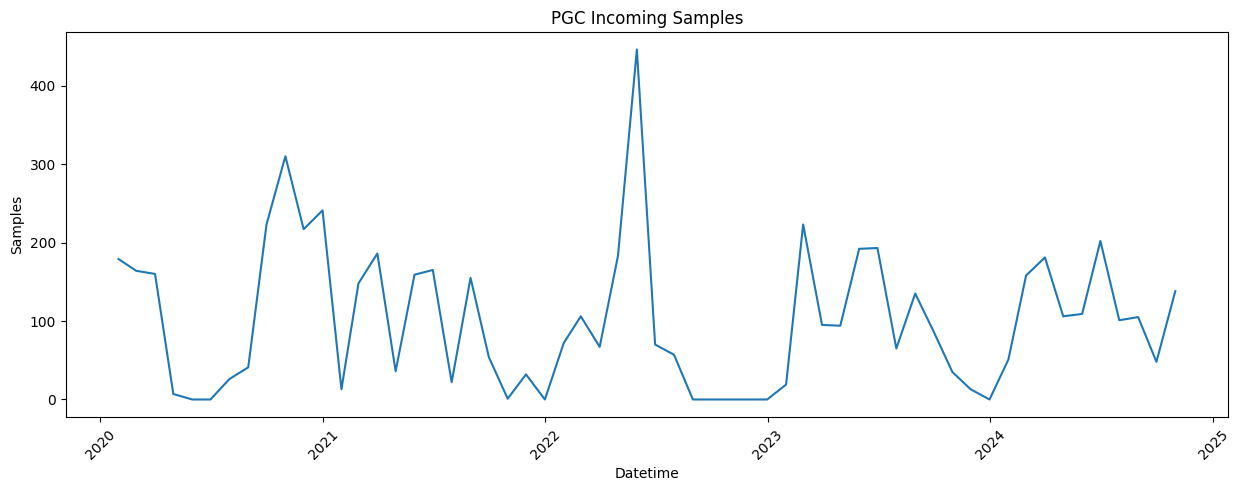

In [17]:
fig, ax = plt.subplots(figsize = (15,5))
plt.plot(data_agr.index, data_agr)
plt.xlabel('Datetime')
plt.ylabel('Samples')
plt.title("PGC Incoming Samples")
plt.xticks(rotation = 45)

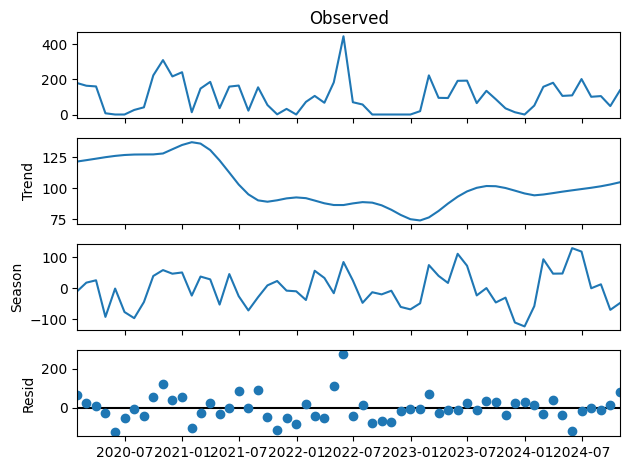

In [18]:
stl = STL(data_agr, seasonal=13)
result = stl.fit()
result.plot()
plt.show()

D:\Temp\ipykernel_148\573578211.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  covid_ph_monthly = covid_ph[['Cases']].resample('M').sum()


(array([18628., 18809., 18993., 19174., 19358., 19539., 19723., 19905.,
        20089.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18809.0, 0, '2021-07'),
  Text(18993.0, 0, '2022-01'),
  Text(19174.0, 0, '2022-07'),
  Text(19358.0, 0, '2023-01'),
  Text(19539.0, 0, '2023-07'),
  Text(19723.0, 0, '2024-01'),
  Text(19905.0, 0, '2024-07'),
  Text(20089.0, 0, '2025-01')])

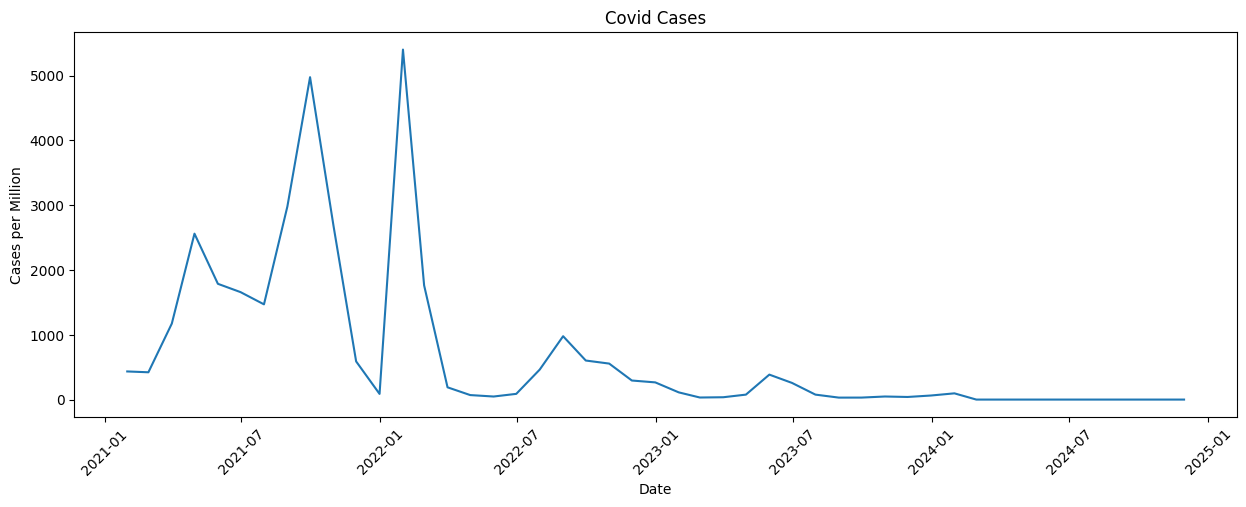

In [19]:
covid_ph = pd.read_csv('covid_cases_ph.csv')


covid_ph['Day'] = pd.to_datetime(covid_ph['Day'])

covid_ph.set_index('Day', inplace=True)

covid_ph_monthly = covid_ph[['Cases']].resample('M').sum()

fig, ax = plt.subplots(figsize = (15,5))
plt.plot(covid_ph_monthly.index, covid_ph_monthly)
plt.xlabel('Date')
plt.ylabel('Cases per Million')
plt.title("Covid Cases")
plt.xticks(rotation = 45)

In [20]:
data_sep = data_raw.copy()
data_sep['Samples'] = data_sep['Samples'].astype(int)
data_sep = data_sep.set_index('Date')
data_sep.index = pd.to_datetime(data_sep.index)
# data_sep.dropna(inplace=True)
data_sep.head()

,Project ID,Project Type,Samples,Date Received,Date Completed
Date,,,,,
2020-01-17,20-001,Capillary+Cleanup,3,17/01/2020,17/01/2020
2020-01-10,20-002,Capillary,6,10/01/2020,01/10/2020
2020-01-16,20-004,PCR-Seq,20,16/01/2020,16/01/2020
2020-01-27,20-007,Extract2Seq,2,27/01/2020,27/01/2020
2020-01-31,20-008,Capillary+Cleanup,32,31/01/2020,31/01/2020


In [21]:
data_sep['Project Type'].unique()

array(['Capillary+Cleanup', 'Capillary', 'PCR-Seq', 'Extract2Seq',
       'Blood DNA Extraction', 'capillary', 'AGE', 'Extract2Sequence',
       'Extract2seq', 'DNA purification', 'CapSeq', 'PCR + Seq',
       'PCR+Capillary+Cleanup', 'single pass Capillary+Cleanup',
       'DNA Extraction', 'Extra2Seq', 'Extract', 'Extraction ',
       'NAextraction', 'Capppilary sequencing ', 'PCR, cleanup,Capillay',
       'Capillary Sequencing', 'capilarry sequencing',
       'Purification+Sequencing', nan, 'Extraction', 'PCR2seq', 'Capseq',
       'PCR2Seq', 'Gel Electrophoresis', 'Extract2PCR',
       'Uni-Capillary+Cleanup', 'Uni-Capillary'], dtype=object)

In [22]:
def clean_method(value):
    if pd.isna(value):
        return np.nan 
    value = value.strip().lower() 

    # Guide:
    # Capillary, Capseq, and PCR-Seq --> same
    # DNA purification and DNA Extraction --> Same
    # Extract2Seq: Blood DNA Extraction --> Cleanup/AGE --> Capseq
    # PCR+Capillary+Cleanup: Cleanup/AGE --> Capseq
    
    mappings = {
        'capillary+cleanup': 'PCR-Seq',
        'capillary sequencing': 'PCR-Seq',
        'capilarry sequencing': 'PCR-Seq',
        'capppilary sequencing': 'PCR-Seq',
        'capillary': 'PCR-Seq',
        'capseq': 'PCR-Seq',
        'pcr-seq': 'PCR-Seq',
        'pcr + seq': 'PCR-Seq',
        'pcr2seq': 'PCR-Seq',
        'pcr2seq ': 'PCR-Seq',
        'pcr, cleanup,capillay': 'PCR-Seq',
        'pcr+capillary+cleanup': 'PCR-Seq',
        'single pass capillary+cleanup': 'PCR-Seq',
        'uni-capillary+cleanup': 'PCR-Seq',
        'uni-capillary': 'PCR-Seq',

        'dna extraction': 'DNA Extraction',
        'blood dna extraction': 'DNA Extraction',
        'dna purification': 'DNA Extraction',
        'naextraction': 'DNA Extraction',
        'purification+sequencing': 'DNA Extraction',
        'extraction': 'DNA Extraction',
        'extraction ': 'DNA Extraction',
        'extract': 'DNA Extraction',

        'extract2seq': 'Extract2Seq',
        'extract2sequence': 'Extract2Seq',
        'extract2seq ': 'Extract2Seq',
        'extra2seq': 'Extract2Seq',
        'extract2pcr': 'Extract2Seq',

        'age': 'AGE',
        'gel electrophoresis': 'AGE'
    }


    

    return mappings.get(value, value)

data_sep['Cleaned_Method'] = data_sep['Project Type'].apply(clean_method)
data_sep = data_sep.sort_index()
data_sep['Cleaned_Method'].unique()


array(['PCR-Seq', 'Extract2Seq', 'DNA Extraction', 'AGE', nan],
      dtype=object)

In [23]:
capseq_data = data_sep[data_sep['Cleaned_Method'] == 'PCR-Seq']
capseq_data = capseq_data[['Samples']].resample('M').sum()
capseq_data = capseq_data.asfreq('M', method='ffill')
capseq_data.head()

D:\Temp\ipykernel_148\1073127747.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  capseq_data = capseq_data[['Samples']].resample('M').sum()
D:\Temp\ipykernel_148\1073127747.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  capseq_data = capseq_data.asfreq('M', method='ffill')


,Samples
Date,
2020-01-31,106
2020-02-29,119
2020-03-31,118
2020-04-30,7
2020-05-31,0


In [24]:
extract2seq_data = data_sep[data_sep['Cleaned_Method'] == 'Extract2Seq']
extract2seq_data = extract2seq_data[['Samples']].resample('M').sum()
extract2seq_data = extract2seq_data.asfreq('M', method='ffill')
extract2seq_data.head()

D:\Temp\ipykernel_148\3817157317.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  extract2seq_data = extract2seq_data[['Samples']].resample('M').sum()
D:\Temp\ipykernel_148\3817157317.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  extract2seq_data = extract2seq_data.asfreq('M', method='ffill')


,Samples
Date,
2020-01-31,3
2020-02-29,34
2020-03-31,18
2020-04-30,0
2020-05-31,0


In [25]:
dnaextract_data = data_sep[data_sep['Cleaned_Method'] == 'DNA Extraction']
dnaextract_data = dnaextract_data[['Samples']].resample('M').sum()
dnaextract_data = dnaextract_data.asfreq('M', method='ffill')
dnaextract_data.head()

D:\Temp\ipykernel_148\1083649945.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dnaextract_data = dnaextract_data[['Samples']].resample('M').sum()
D:\Temp\ipykernel_148\1083649945.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dnaextract_data = dnaextract_data.asfreq('M', method='ffill')


,Samples
Date,
2020-01-31,70
2020-02-29,11
2020-03-31,24
2020-04-30,0
2020-05-31,0


In [26]:
age_data = data_sep[data_sep['Cleaned_Method'] == 'AGE']
age_data = age_data[['Samples']].resample('M').sum()
age_data = age_data.asfreq('M', method='ffill')
age_data.head()

D:\Temp\ipykernel_148\3725112287.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  age_data = age_data[['Samples']].resample('M').sum()
D:\Temp\ipykernel_148\3725112287.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  age_data = age_data.asfreq('M', method='ffill')


,Samples
Date,
2020-07-31,1
2020-08-31,0
2020-09-30,0
2020-10-31,0
2020-11-30,0


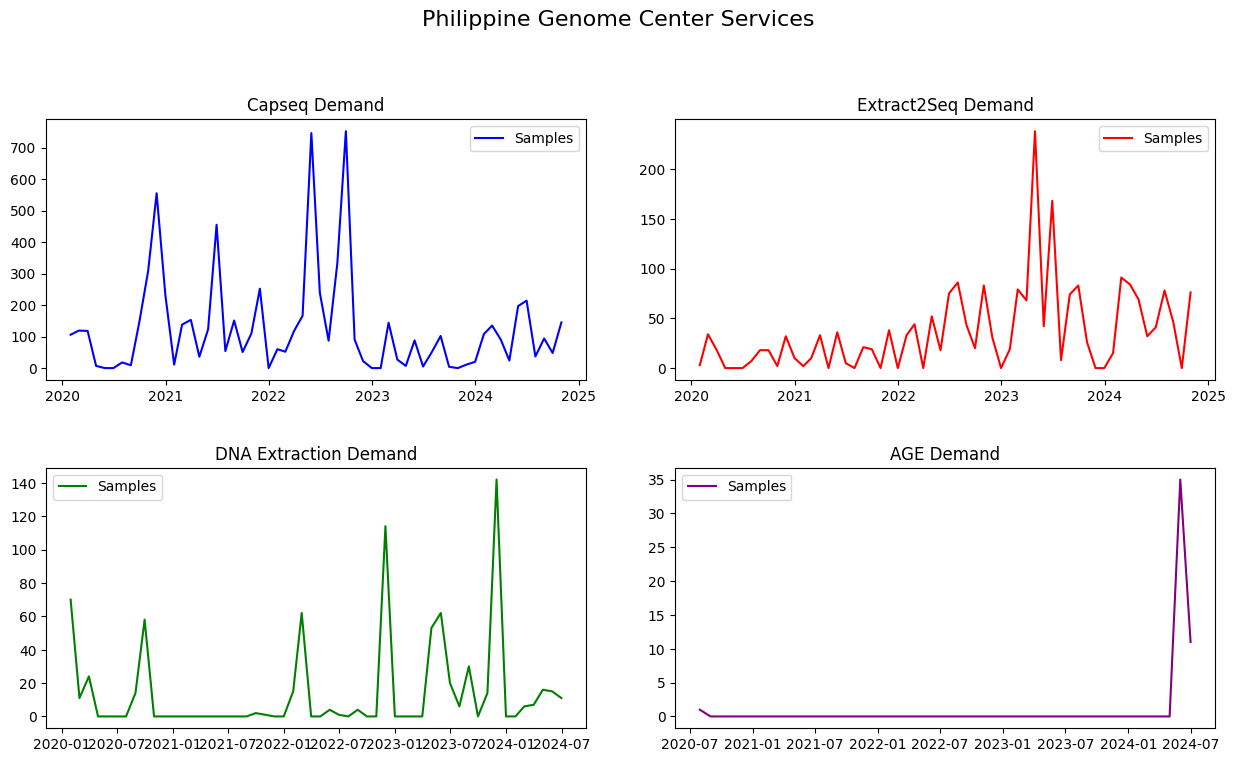

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(13, 8))  # 2x2 grid

axes[0, 0].plot(capseq_data.index, capseq_data['Samples'], label='Samples', color='blue')
axes[0, 0].set_title('Capseq Demand')
axes[0, 0].legend()

axes[0, 1].plot(extract2seq_data.index, extract2seq_data['Samples'], label='Samples', color='red')
axes[0, 1].set_title('Extract2Seq Demand')
axes[0, 1].legend()

axes[1, 0].plot(dnaextract_data.index, dnaextract_data['Samples'], label='Samples', color='green')
axes[1, 0].set_title('DNA Extraction Demand')
axes[1, 0].legend()

axes[1, 1].plot(age_data.index, age_data['Samples'], label='Samples', color='purple')
axes[1, 1].set_title('AGE Demand')
axes[1, 1].legend()

fig.suptitle('Philippine Genome Center Services', fontsize=16)
fig.tight_layout(pad=3.0)

plt.show()


In [ ]:
capseq_data_all = capseq_data + extract2seq_data
dnaextract_data_all = dnaextract_data + extract2seq_data

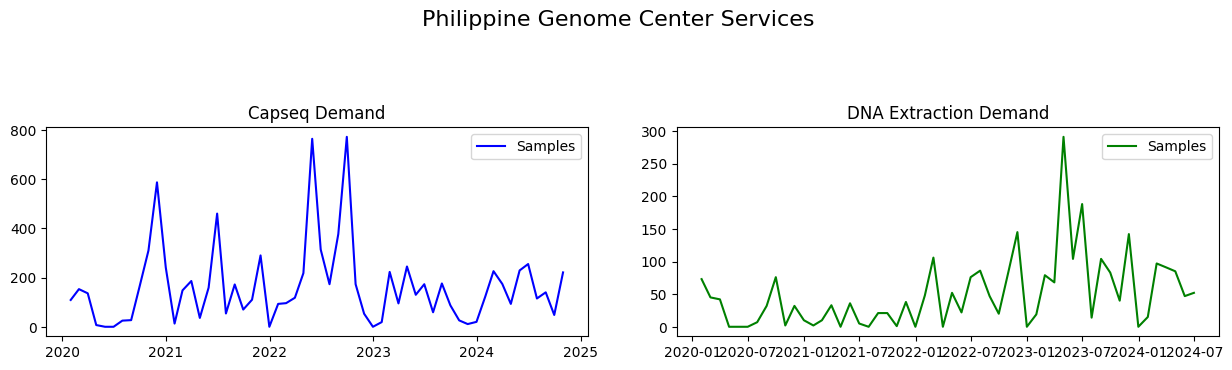

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4))  # 2x2 grid

axes[0].plot(capseq_data_all.index, capseq_data_all['Samples'], label='Samples', color='blue')
axes[0].set_title('Capseq Demand')
axes[0].legend()

axes[1].plot(dnaextract_data_all.index, dnaextract_data_all['Samples'], label='Samples', color='green')
axes[1].set_title('DNA Extraction Demand')
axes[1].legend()



fig.suptitle('Philippine Genome Center Services', fontsize=16)
fig.tight_layout(pad=3.0)

plt.show()

In [39]:
capseq_data_all.isnull().values.any()

np.False_

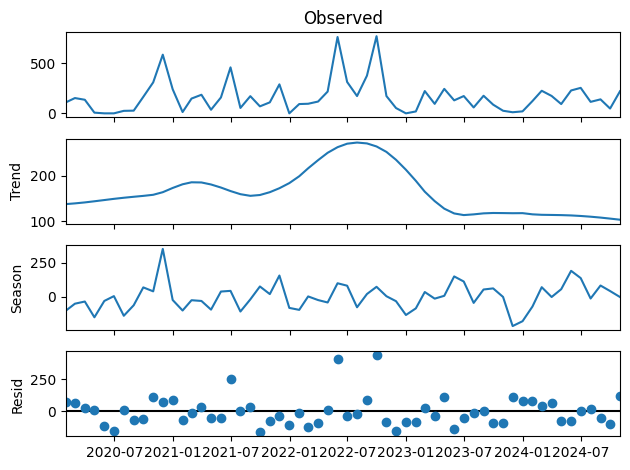

In [36]:
capseq_all_stl = STL(capseq_data_all, seasonal=13)
capseq_result = capseq_all_stl.fit()
capseq_result.plot()
plt.show()

In [38]:
dnaextract_data_all.isnull().values.any()

np.True_

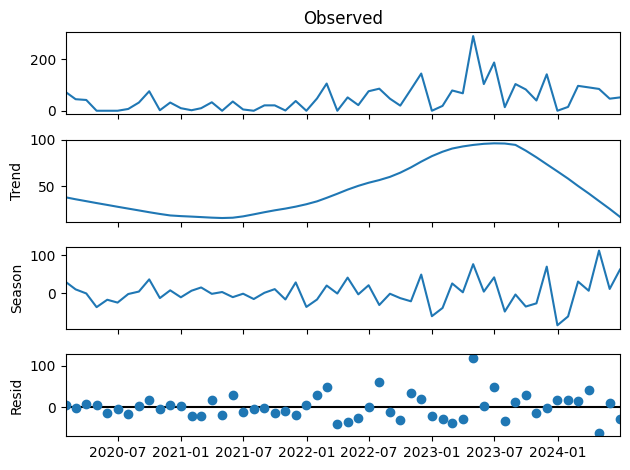

In [40]:
dnaextract_data_all.dropna(inplace=True)
dnaextract_all_stl = STL(dnaextract_data_all, seasonal=13)
dnaextract_result = dnaextract_all_stl.fit()
dnaextract_result.plot()
plt.show()

**Creating lag features for the capseq data**

In [57]:
capseq_xgb = capseq_data_all.copy()
capseq_xgb['Lag3M'] = capseq_xgb['Samples'].shift(3)
capseq_xgb['Lag6M'] = capseq_xgb['Samples'].shift(6)
capseq_xgb['Lag9M'] = capseq_xgb['Samples'].shift(9)
capseq_xgb['Lag1Y'] = capseq_xgb['Samples'].shift(12)
capseq_xgb.dropna(inplace=True)
capseq_xgb.head()

,Samples,Lag3M,Lag6M,Lag9M,Lag1Y
Date,,,,,
2021-01-31,13,310.0,25.0,7.0,109.0
2021-02-28,148,587.0,27.0,0.0,153.0
2021-03-31,186,241.0,165.0,0.0,136.0
2021-04-30,36,13.0,310.0,25.0,7.0
2021-05-31,159,148.0,587.0,27.0,0.0


**Training an XGBoost model for the capseq data**

In [58]:
from sklearn.model_selection import train_test_split

X = capseq_xgb[['Lag3M', 'Lag6M', 'Lag9M', 'Lag1Y']]
y = capseq_xgb['Samples']

# Split data into training and testing sets (80% training, 20% testing)
train_size = int(len(capseq_xgb) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training data: {X_train.shape}")
print(f"Testing data: {X_test.shape}")

Training data: (36, 4)
Testing data: (10, 4)


In [59]:
import xgboost as xgb

model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Predictions:", y_pred)

Predictions: [132.70534 153.835   197.61731 204.1202  147.88885 157.72595 188.12418
 136.04959  69.52362 197.637  ]


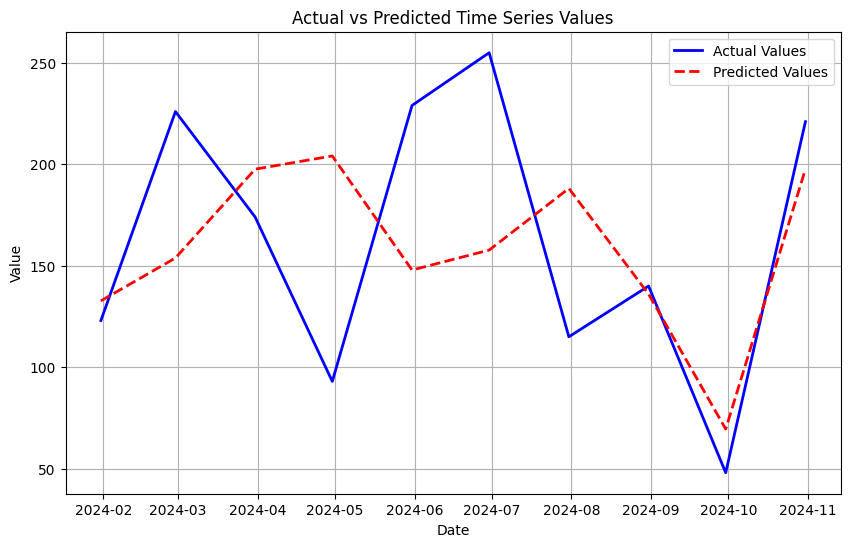

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Values', color='blue', linewidth=2)
plt.plot(y_test.index, y_pred, label='Predicted Values', color='red', linestyle='--', linewidth=2)

plt.title('Actual vs Predicted Capseq Demand')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.grid(True)
plt.show()

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 51.69542388916015
Root Mean Squared Error: 63.7342607598759


In [62]:
importance = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

  Feature  Importance
2   Lag9M    0.365695
0   Lag3M    0.244152
3   Lag1Y    0.230739
1   Lag6M    0.159414
